In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#importing other libraries
import matplotlib.pyplot as plt   #visualization
import seaborn as sns    # detailed visualization
import json  #to import and work with Json files

**This Exploratory Data Analysis is using linkedin data analyst jobs listing dataset which consist of three regions such as Africa, USA and Canada. Whereas only dataset of region USA is used here.**

In [3]:
usa_df=pd.read_csv('/content/linkedin-jobs-usa.csv')

In [4]:
usa_df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


In [5]:
usa_df.columns

Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'criteria', 'posted_date', 'link'],
      dtype='object')

In [6]:
usa_df.shape

(2845, 9)

In [7]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2845 non-null   object
 1   company        2845 non-null   object
 2   description    2845 non-null   object
 3   onsite_remote  2845 non-null   object
 4   salary         929 non-null    object
 5   location       2845 non-null   object
 6   criteria       2845 non-null   object
 7   posted_date    2845 non-null   object
 8   link           2845 non-null   object
dtypes: object(9)
memory usage: 200.2+ KB


In [8]:
# Converting Posted_date to date_time type

usa_df['posted_date']=pd.to_datetime(usa_df['posted_date'])
usa_df['posted_date'].dtypes

dtype('<M8[ns]')

In [9]:
#checking for null values
usa_df.isnull().sum()

,0
title,0
company,0
description,0
onsite_remote,0
salary,1916
location,0
criteria,0
posted_date,0
link,0


In [10]:
#checking for duplicate values
usa_df.duplicated().sum()

0

### Mimum Median Salary And Maximum Median Salary

In [11]:
#Cleaning salary column as there 1916 null values and slored in string format
salary=[]
sal=usa_df['salary'].dropna()

sal= ["".join(s.split()) for s in sal]   # spliting each terms in string to get
sal=[s.split("-",1) for s in sal]

mini=[float(m) for m in (str(s[0]).replace('$','').replace(',','') for s in sal) ]
maxi=[float(m) for m in (str(s[1]).replace('$','').replace(',','') for s in sal) ]

minimum_salary=[ i for i in mini if i>=30000]    #As there are many outliners
maximum_salary=[ i for i in maxi if i>=30000]


max_min=pd.DataFrame(data=zip(minimum_salary,maximum_salary),columns=["minimum_salary","maximum_salary"])

max_min.describe()

,minimum_salary,maximum_salary
count,498.000000,498.000000
mean,89169.196787,108798.263052
std,22625.837194,24830.283708
min,50000.000000,55000.000000
25%,73036.000000,90000.000000
50%,80000.000000,105901.000000
75%,100000.000000,127500.000000
max,130000.000000,155000.000000


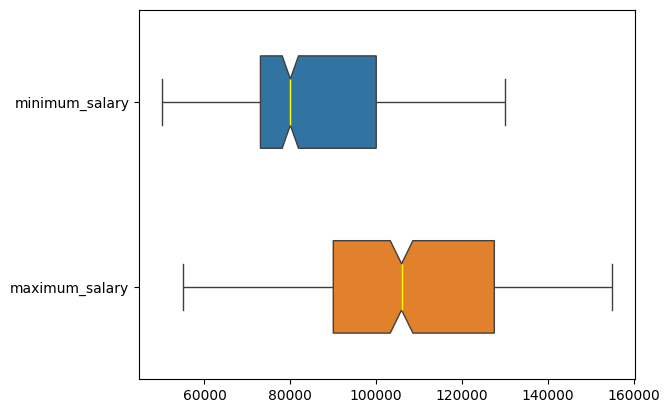

In [12]:
sns.boxplot(data=max_min,orient="h",notch=True,medianprops={"color":"yellow"},width=0.5)
plt.show()

# Most preferred Job type: Onsite/Remote/Hybrid

<ipython-input-13-514977551b63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='onsite_remote',y='count',data=job_type,palette='cool')


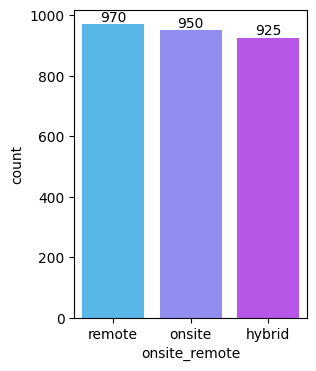

,onsite_remote,count
0,remote,970
1,onsite,950
2,hybrid,925


In [13]:
job_type=usa_df['onsite_remote'].value_counts().rename_axis('onsite_remote').reset_index(name='count')

plt.figure(figsize=(3,4))
ax=sns.barplot(x='onsite_remote',y='count',data=job_type,palette='cool')

for container in ax.containers:
    ax.bar_label(container)

plt.show()
job_type

# Different Data Analyst role

In [14]:
usa_df['title'].value_counts()

,count
title,
Data Analyst,2110
Data Analyst - Recent Graduate,183
Junior Data Analyst,139
Data Analyst - (Remote - US),62
Entry-Level Data Analyst,37
Associate Data Analyst,37
SQL Data Analyst,37
Analyst (Global Data and Analytics),36
"Analyst, Data and Analytics",36


# Companies with more hirings

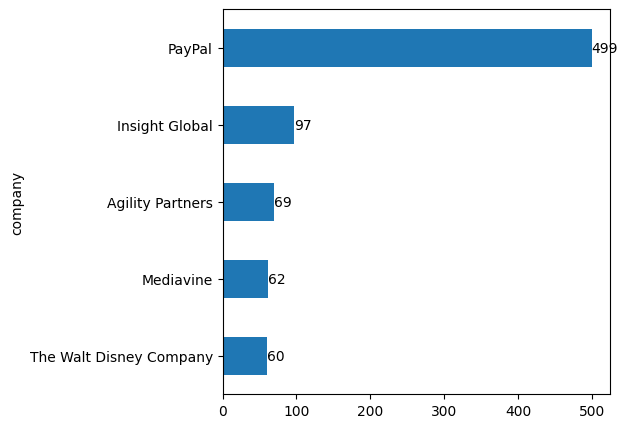

In [15]:
c_vc=usa_df['company'].value_counts().sort_values(ascending=True)
remove_i=c_vc[c_vc<50].index
c_vc.drop(labels=remove_i,inplace=True)

c_ax=c_vc.plot(kind="barh",figsize=(5,5))

for container in c_ax.containers:
    c_ax.bar_label(container)

plt.show()

# Top 10 locations to work

In [16]:
#Places that provide opportunities for growth
usa_df['location'].value_counts().head(10)

,count
location,
United States,632
New York City Metropolitan Area,179
"Chicago, IL",153
"New York, NY",100
"Austin, TX",72
"Texas, United States",67
"Timonium, MD",61
"Dallas, TX",55
"Boston, MA",54


# Days on which most jobs are posted

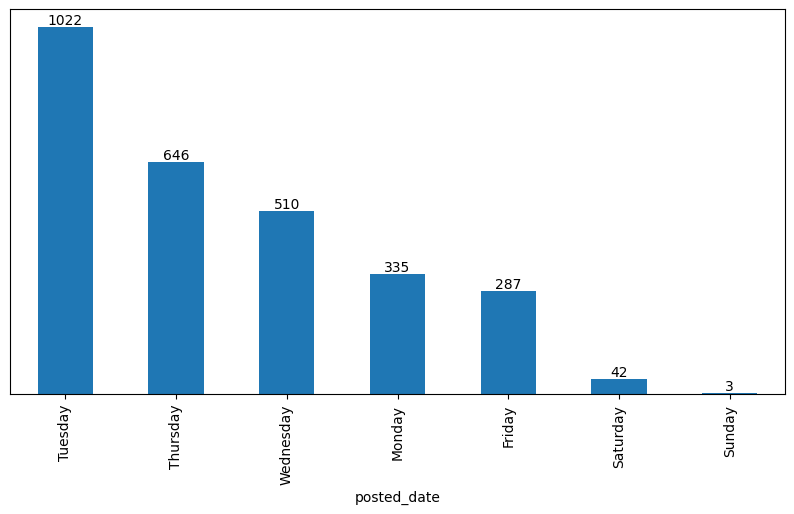

In [17]:
days=usa_df['posted_date'].dt.day_name().value_counts()

d_ax=days.plot(kind="bar",figsize=(10,5))

for container in d_ax.containers:
    d_ax.bar_label(container)

plt.yticks(ticks=[],labels=[])
plt.show()

# Most required Criteria in Seniority level, Employment type, job function and Industries

In [18]:
usa_df['criteria'][0:5]   #each record is list with dictionaries as its items in string format



,criteria
0,"[{'Seniority level': 'Not Applicable'}, {'Empl..."
1,"[{'Seniority level': 'Not Applicable'}, {'Empl..."
2,"[{'Seniority level': 'Not Applicable'}, {'Empl..."
3,"[{'Seniority level': 'Not Applicable'}, {'Empl..."
4,"[{'Seniority level': 'Entry level'}, {'Employm..."


In [19]:
#each item are split with delimeter comma(,) and returned as string in list

c=usa_df['criteria'].apply(lambda x: x[1:-1].split(',',3)).to_list()

print(c[0]) #list of items as string
c[0][0] #dictionary as string


["{'Seniority level': 'Not Applicable'}", " {'Employment type': 'Full-time'}", " {'Job function': 'Information Technology'}", " {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}"]


"{'Seniority level': 'Not Applicable'}"

In [20]:
sl=[]
et=[]
jf=[]
ind=[]

In [21]:
# function which takes list as arguments and convert each item to dictionary.
#Values are extracted from respective keys and appended to respective list

import json
def dict_con(d):
    try:
        d1=(json.loads(i.replace("'",'"')) for i in d)
        for i in d1:
            if "Seniority level" in i.keys():
                sl.extend(i.values())
            if "Employment type" in i.keys():
                et.extend(i.values())
            if "Job function" in i.keys():
                jf.extend(i.values())
            if "Industries" in i.keys():
                ind.extend(i.values())
    except:
        pass


for i in c:
    dict_con(i)


In [22]:
Seniority_level=pd.Series(sl)
Employment_type=pd.Series(et)
Job_function=pd.Series(jf)
Industries=pd.Series(ind)

#### Seniority level expections

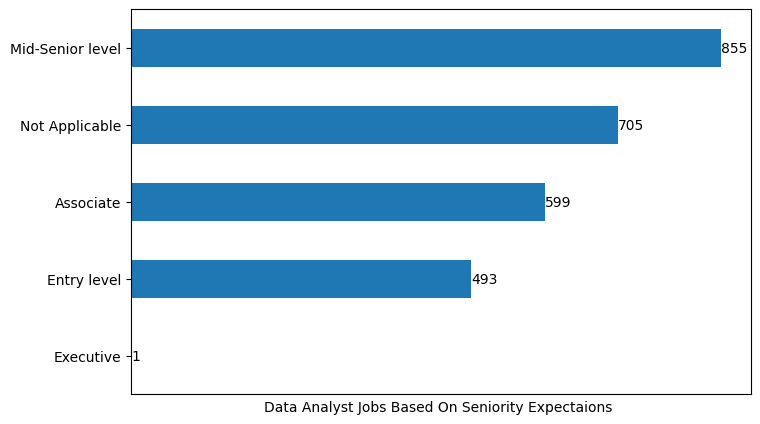

In [23]:
ax=Seniority_level.value_counts().sort_values(ascending=True).plot(kind="barh",figsize=(8,5))

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Data Analyst Jobs Based On Seniority Expectaions ")
plt.xticks(ticks=[],labels=[])

plt.show()

#### Employment type

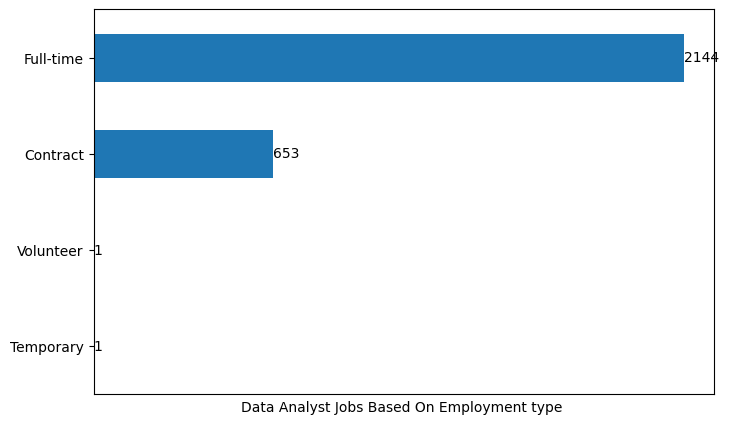

In [24]:
b=Employment_type.value_counts().sort_values(ascending=True).plot(kind="barh",figsize=(8,5))

for container in b.containers:
    b.bar_label(container)

plt.xlabel("Data Analyst Jobs Based On Employment type ")
plt.xticks(ticks=[],labels=[])

plt.show()

#### Job function

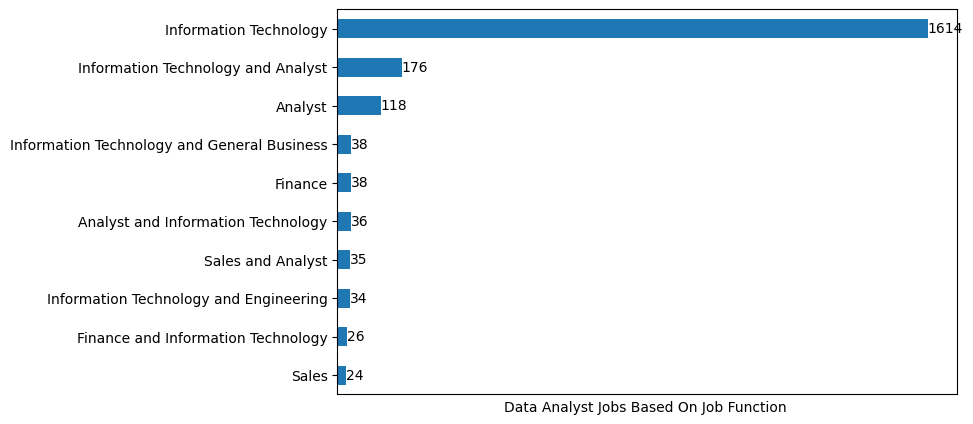

In [25]:
jf_vc=Job_function.value_counts()
remove=jf_vc[jf_vc<20].index
jf_vc.drop(labels=remove,inplace=True)


jf_ax=jf_vc.sort_values(ascending=True).plot(kind="barh",figsize=(8,5))

for container in jf_ax.containers:
    jf_ax.bar_label(container)

plt.xlabel("Data Analyst Jobs Based On Job Function ")
plt.xticks(ticks=[],labels=[])

plt.show()

#### Industries

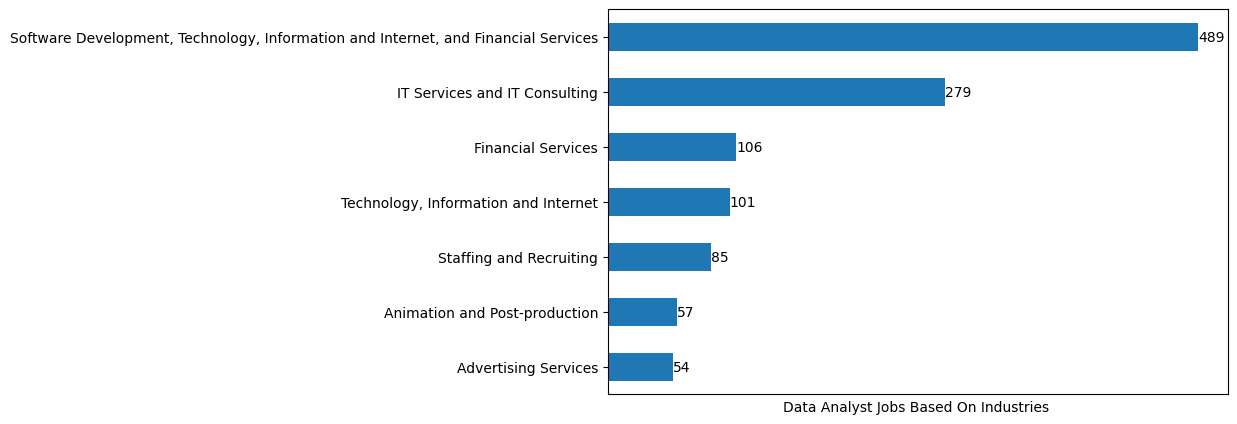

In [26]:
i_vc=Industries.value_counts()
remove_i=i_vc[i_vc<50].index
i_vc.drop(labels=remove_i,inplace=True)


ind_ax=i_vc.sort_values(ascending=True).plot(kind="barh",figsize=(8,5))

for container in ind_ax.containers:
    ind_ax.bar_label(container)

plt.xlabel("Data Analyst Jobs Based On Industries ")
plt.xticks(ticks=[],labels=[])

plt.show()